In [2]:
import numpy as np
import pandas as pd
import string
from sklearn.model_selection import train_test_split

seed=12122008
X=[]
Y=[]
D=[]
translator = str.maketrans(dict.fromkeys(string.punctuation))
archivo=open("sms.txt")
id=1
for linea in archivo:
    linea=linea.strip().split("\t")
    s=linea[1].translate(translator)
    x=[id,s]
    y=[0,1] if linea[0]=="spam" else [1,0]
    D.append([id,s,y[1]])
    X.append(x)
    Y.append(y)
    id=id+1
archivo.close()

X=np.asarray(X)
Y=np.asarray(Y)
df=pd.DataFrame(D,columns=["id","message","spam"])
df.astype("object").describe()

,id,message,spam
count,5574,5574,5574
unique,5574,5136,2
top,1,Sorry Ill call later,0
freq,1,30,4827


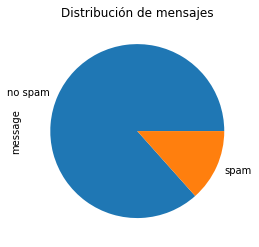

In [3]:
df.groupby("spam")["message"].\
agg("count").plot.pie(title="Distribución de mensajes",
            labels=["no spam","spam"]);

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X[:,1])
words=list(tokenizer.word_index.keys())
print(words[0:10])
vocabulary=len(words)+1
print(vocabulary)

2023-06-24 11:34:01.278940: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


['to', 'i', 'you', 'a', 'the', 'u', 'and', 'is', 'in', 'me']
9656


In [5]:
seed=12122008
base_x_train, base_x_test, y_train, y_test = train_test_split(
            X, Y, test_size=0.1, stratify=Y, random_state=seed)
base_x_train, base_x_val, y_train, y_val = train_test_split(
            base_x_train,y_train, test_size=0.1, stratify=y_train, random_state=seed)

In [6]:
x_train=base_x_train[:,1]
x_test=base_x_test[:,1]
x_val=base_x_val[:,1]
pd.DataFrame(base_x_train).to_csv("base_x_train.csv",index=False,header=False,sep="\t")
pd.DataFrame(base_x_test).to_csv("base_x_test.csv",index=False,header=False,sep="\t")
pd.DataFrame(base_x_val).to_csv("base_x_val.csv",index=False,header=False,sep="\t")

x_train_s = tokenizer.texts_to_sequences(x_train)
x_train_s = pad_sequences(x_train_s,maxlen=171)
x_test_s = tokenizer.texts_to_sequences(x_test)
x_test_s = pad_sequences(x_test_s,maxlen=171)
x_val_s= tokenizer.texts_to_sequences(x_val)
x_val_s = pad_sequences(x_val_s,maxlen=171)
print(len(x_train_s[0]),len(x_val_s[0]),len(x_test_s[0]))

171 171 171


In [7]:
pd.DataFrame(x_train_s).to_csv("x_train.csv",index=False,header=False,sep="\t")
pd.DataFrame(y_train).to_csv("y_train.csv",index=False,header=False,sep="\t")
pd.DataFrame(x_test_s).to_csv("x_test.csv",index=False,header=False,sep="\t")
pd.DataFrame(y_test).to_csv("y_test.csv",index=False,header=False,sep="\t")
pd.DataFrame(x_val_s).to_csv("x_val.csv",index=False,header=False,sep="\t")
pd.DataFrame(y_val).to_csv("y_val.csv",index=False,header=False,sep="\t")